Example notebook showing how to use the nested sampler with a lower number of live points and MCMC steps

In [1]:
import os
import sys
import argparse
import torch
import logging
from getdist import plots, MCSamples
import getdist
import numpy as np
from scipy.stats import multivariate_normal

In [2]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [3]:
from nnest import NestedSampler
from nnest.likelihoods import *

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# Likelihood + prior
#like = Himmelblau(2)
#transform = lambda x: 5*x
#like = Rosenbrock(4)
#transform = lambda x: 5*x
#like = Gaussian(2, 0.9)
#transform = lambda x: 3*x
#like = Eggbox(2)
#transform = lambda x: 5*np.pi*x
like = GaussianShell(2)
transform = lambda x: 5*x
#like = GaussianMix(2)
#transform = lambda x: 5*x

In [6]:
sampler = NestedSampler(like.x_dim, like, transform=transform, num_live_points=100, hidden_dim=16, 
                        num_blocks=3, flow='spline')

Creating directory for new run logs/test/run1
[nnest.trainer] [INFO] SingleSpeedSpline(
  (flow): NormalizingFlow(
    (flows): ModuleList(
      (0): ActNorm()
      (1): Invertible1x1Conv()
      (2): NSF_CL(
        (f1): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
            (5): LeakyReLU(negative_slope=0.2)
            (6): Linear(in_features=16, out_features=23, bias=True)
          )
        )
        (f2): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_fea

In [7]:
sampler.run(strategy=['rejection_prior', 'rejection_flow', 'mcmc'], mcmc_steps=5*like.x_dim)

[nnest.sampler] [INFO] MCMC steps [10]
[nnest.sampler] [INFO] Initial scale [1.4142]
[nnest.sampler] [INFO] Volume switch [-1.0000]
[nnest.sampler] [INFO] Step [0] loglstar [-1.1312e+03] max logl [-1.3170e-04] logz [-1.1358e+03] vol [1.00000e+00] ncalls [101] mean calls [0.0000]
[nnest.sampler] [INFO] Step [20] loglstar [-4.8955e+02] max logl [-1.3170e-04] logz [-4.9436e+02] vol [8.18731e-01] ncalls [122] mean calls [1.0500]
[nnest.sampler] [INFO] Step [40] loglstar [-3.8032e+02] max logl [-1.3170e-04] logz [-3.8533e+02] vol [6.70320e-01] ncalls [147] mean calls [1.2500]
[nnest.sampler] [INFO] Step [60] loglstar [-2.8539e+02] max logl [-1.3170e-04] logz [-2.9033e+02] vol [5.48812e-01] ncalls [175] mean calls [1.4000]
[nnest.sampler] [INFO] Step [80] loglstar [-2.0746e+02] max logl [-1.3170e-04] logz [-2.1282e+02] vol [4.49329e-01] ncalls [211] mean calls [1.8000]
[nnest.sampler] [INFO] Step [100] loglstar [-1.4105e+02] max logl [-1.3170e-04] logz [-1.4606e+02] vol [3.67879e-01] ncalls 

--- Logging error ---
Traceback (most recent call last):
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/sampler.py", line 525, in _rejection_flow_sample
    x, log_det_J = self.trainer.netG.inverse(torch.from_numpy(z).float().to(self.trainer.device))
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 69, in inverse
    return self.flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 39, in inverse
    z, ld = flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 616, in inverse
    upper, ld = unconstrained_RQS(upper, W, H, D, inverse=True, tail_bound=self.B)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 444, in unconstrained_RQS
    outputs[inside_intvl_mask], logabsdet[inside_intvl_mask] = RQS(
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 463, in RQS
    if torch.min(inputs) < left or torch.max(inputs) > right:
RuntimeError: operation does not have 

[nnest.sampler] [INFO] Step [320] loglstar [-1.2641e+00] max logl [-1.3170e-04] logz [-5.9853e+00] vol [4.07622e-02] ncalls [1194] mean calls [3.9000]
[nnest.sampler] [INFO] Step [340] loglstar [-8.3283e-01] max logl [-1.0541e-05] logz [-5.2511e+00] vol [3.33733e-02] ncalls [1255] mean calls [3.0500]


--- Logging error ---
Traceback (most recent call last):
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/sampler.py", line 525, in _rejection_flow_sample
    x, log_det_J = self.trainer.netG.inverse(torch.from_numpy(z).float().to(self.trainer.device))
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 69, in inverse
    return self.flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 39, in inverse
    z, ld = flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 609, in inverse
    lower, ld = unconstrained_RQS(lower, W, H, D, inverse=True, tail_bound=self.B)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 444, in unconstrained_RQS
    outputs[inside_intvl_mask], logabsdet[inside_intvl_mask] = RQS(
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 463, in RQS
    if torch.min(inputs) < left or torch.max(inputs) > right:
RuntimeError: operation does not have 

--- Logging error ---
Traceback (most recent call last):
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/sampler.py", line 525, in _rejection_flow_sample
    x, log_det_J = self.trainer.netG.inverse(torch.from_numpy(z).float().to(self.trainer.device))
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 69, in inverse
    return self.flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 39, in inverse
    z, ld = flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 609, in inverse
    lower, ld = unconstrained_RQS(lower, W, H, D, inverse=True, tail_bound=self.B)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 444, in unconstrained_RQS
    outputs[inside_intvl_mask], logabsdet[inside_intvl_mask] = RQS(
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 463, in RQS
    if torch.min(inputs) < left or torch.max(inputs) > right:
RuntimeError: operation does not have 

[nnest.sampler] [INFO] Step [360] loglstar [-6.6979e-01] max logl [-1.0541e-05] logz [-4.8156e+00] vol [2.73237e-02] ncalls [1330] mean calls [3.7500]


--- Logging error ---
Traceback (most recent call last):
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/sampler.py", line 525, in _rejection_flow_sample
    x, log_det_J = self.trainer.netG.inverse(torch.from_numpy(z).float().to(self.trainer.device))
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 69, in inverse
    return self.flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 39, in inverse
    z, ld = flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 609, in inverse
    lower, ld = unconstrained_RQS(lower, W, H, D, inverse=True, tail_bound=self.B)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 444, in unconstrained_RQS
    outputs[inside_intvl_mask], logabsdet[inside_intvl_mask] = RQS(
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 463, in RQS
    if torch.min(inputs) < left or torch.max(inputs) > right:
RuntimeError: operation does not have 

--- Logging error ---
Traceback (most recent call last):
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/sampler.py", line 525, in _rejection_flow_sample
    x, log_det_J = self.trainer.netG.inverse(torch.from_numpy(z).float().to(self.trainer.device))
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 69, in inverse
    return self.flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 39, in inverse
    z, ld = flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 616, in inverse
    upper, ld = unconstrained_RQS(upper, W, H, D, inverse=True, tail_bound=self.B)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 444, in unconstrained_RQS
    outputs[inside_intvl_mask], logabsdet[inside_intvl_mask] = RQS(
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 463, in RQS
    if torch.min(inputs) < left or torch.max(inputs) > right:
RuntimeError: operation does not have 

--- Logging error ---
Traceback (most recent call last):
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/sampler.py", line 525, in _rejection_flow_sample
    x, log_det_J = self.trainer.netG.inverse(torch.from_numpy(z).float().to(self.trainer.device))
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 69, in inverse
    return self.flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 39, in inverse
    z, ld = flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 616, in inverse
    upper, ld = unconstrained_RQS(upper, W, H, D, inverse=True, tail_bound=self.B)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 444, in unconstrained_RQS
    outputs[inside_intvl_mask], logabsdet[inside_intvl_mask] = RQS(
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 463, in RQS
    if torch.min(inputs) < left or torch.max(inputs) > right:
RuntimeError: operation does not have 

--- Logging error ---
Traceback (most recent call last):
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/sampler.py", line 525, in _rejection_flow_sample
    x, log_det_J = self.trainer.netG.inverse(torch.from_numpy(z).float().to(self.trainer.device))
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 69, in inverse
    return self.flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 39, in inverse
    z, ld = flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 616, in inverse
    upper, ld = unconstrained_RQS(upper, W, H, D, inverse=True, tail_bound=self.B)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 444, in unconstrained_RQS
    outputs[inside_intvl_mask], logabsdet[inside_intvl_mask] = RQS(
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 463, in RQS
    if torch.min(inputs) < left or torch.max(inputs) > right:
RuntimeError: operation does not have 

--- Logging error ---
Traceback (most recent call last):
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/sampler.py", line 525, in _rejection_flow_sample
    x, log_det_J = self.trainer.netG.inverse(torch.from_numpy(z).float().to(self.trainer.device))
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 69, in inverse
    return self.flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 39, in inverse
    z, ld = flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 609, in inverse
    lower, ld = unconstrained_RQS(lower, W, H, D, inverse=True, tail_bound=self.B)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 444, in unconstrained_RQS
    outputs[inside_intvl_mask], logabsdet[inside_intvl_mask] = RQS(
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 463, in RQS
    if torch.min(inputs) < left or torch.max(inputs) > right:
RuntimeError: operation does not have 

[nnest.sampler] [INFO] Step [380] loglstar [-4.4578e-01] max logl [-1.0541e-05] logz [-4.5143e+00] vol [2.23708e-02] ncalls [1435] mean calls [5.2500]


--- Logging error ---
Traceback (most recent call last):
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/sampler.py", line 525, in _rejection_flow_sample
    x, log_det_J = self.trainer.netG.inverse(torch.from_numpy(z).float().to(self.trainer.device))
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 69, in inverse
    return self.flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 39, in inverse
    z, ld = flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 616, in inverse
    upper, ld = unconstrained_RQS(upper, W, H, D, inverse=True, tail_bound=self.B)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 444, in unconstrained_RQS
    outputs[inside_intvl_mask], logabsdet[inside_intvl_mask] = RQS(
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 463, in RQS
    if torch.min(inputs) < left or torch.max(inputs) > right:
RuntimeError: operation does not have 

--- Logging error ---
Traceback (most recent call last):
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/sampler.py", line 525, in _rejection_flow_sample
    x, log_det_J = self.trainer.netG.inverse(torch.from_numpy(z).float().to(self.trainer.device))
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 69, in inverse
    return self.flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 39, in inverse
    z, ld = flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 616, in inverse
    upper, ld = unconstrained_RQS(upper, W, H, D, inverse=True, tail_bound=self.B)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 444, in unconstrained_RQS
    outputs[inside_intvl_mask], logabsdet[inside_intvl_mask] = RQS(
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 463, in RQS
    if torch.min(inputs) < left or torch.max(inputs) > right:
RuntimeError: operation does not have 

--- Logging error ---
Traceback (most recent call last):
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/sampler.py", line 525, in _rejection_flow_sample
    x, log_det_J = self.trainer.netG.inverse(torch.from_numpy(z).float().to(self.trainer.device))
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 69, in inverse
    return self.flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 39, in inverse
    z, ld = flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 609, in inverse
    lower, ld = unconstrained_RQS(lower, W, H, D, inverse=True, tail_bound=self.B)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 444, in unconstrained_RQS
    outputs[inside_intvl_mask], logabsdet[inside_intvl_mask] = RQS(
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 463, in RQS
    if torch.min(inputs) < left or torch.max(inputs) > right:
RuntimeError: operation does not have 

--- Logging error ---
Traceback (most recent call last):
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/sampler.py", line 525, in _rejection_flow_sample
    x, log_det_J = self.trainer.netG.inverse(torch.from_numpy(z).float().to(self.trainer.device))
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 69, in inverse
    return self.flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 39, in inverse
    z, ld = flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 609, in inverse
    lower, ld = unconstrained_RQS(lower, W, H, D, inverse=True, tail_bound=self.B)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 444, in unconstrained_RQS
    outputs[inside_intvl_mask], logabsdet[inside_intvl_mask] = RQS(
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 463, in RQS
    if torch.min(inputs) < left or torch.max(inputs) > right:
RuntimeError: operation does not have 

--- Logging error ---
Traceback (most recent call last):
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/sampler.py", line 525, in _rejection_flow_sample
    x, log_det_J = self.trainer.netG.inverse(torch.from_numpy(z).float().to(self.trainer.device))
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 69, in inverse
    return self.flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 39, in inverse
    z, ld = flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 609, in inverse
    lower, ld = unconstrained_RQS(lower, W, H, D, inverse=True, tail_bound=self.B)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 444, in unconstrained_RQS
    outputs[inside_intvl_mask], logabsdet[inside_intvl_mask] = RQS(
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 463, in RQS
    if torch.min(inputs) < left or torch.max(inputs) > right:
RuntimeError: operation does not have 

[nnest.trainer] [INFO] Number of training samples [100]
[nnest.trainer] [INFO] Training jitter [0.0019]
[nnest.trainer] [INFO] Epoch [1] train loss [-0.0145] validation loss [-0.1070]


--- Logging error ---
Traceback (most recent call last):
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/sampler.py", line 525, in _rejection_flow_sample
    x, log_det_J = self.trainer.netG.inverse(torch.from_numpy(z).float().to(self.trainer.device))
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 69, in inverse
    return self.flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 39, in inverse
    z, ld = flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 609, in inverse
    lower, ld = unconstrained_RQS(lower, W, H, D, inverse=True, tail_bound=self.B)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 444, in unconstrained_RQS
    outputs[inside_intvl_mask], logabsdet[inside_intvl_mask] = RQS(
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 463, in RQS
    if torch.min(inputs) < left or torch.max(inputs) > right:
RuntimeError: operation does not have 

[nnest.trainer] [INFO] Epoch [100] train loss [-0.0287] validation loss [-0.1177]
[nnest.trainer] [INFO] Epoch [126] ran out of patience
[nnest.trainer] [INFO] Best epoch [76] validation loss [-0.1788]


--- Logging error ---
Traceback (most recent call last):
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/sampler.py", line 525, in _rejection_flow_sample
    x, log_det_J = self.trainer.netG.inverse(torch.from_numpy(z).float().to(self.trainer.device))
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 69, in inverse
    return self.flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 39, in inverse
    z, ld = flow.inverse(z)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 609, in inverse
    lower, ld = unconstrained_RQS(lower, W, H, D, inverse=True, tail_bound=self.B)
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 444, in unconstrained_RQS
    outputs[inside_intvl_mask], logabsdet[inside_intvl_mask] = RQS(
  File "/Users/adammoss/work/code/MCMC/nnest/nnest/networks.py", line 463, in RQS
    if torch.min(inputs) < left or torch.max(inputs) > right:
RuntimeError: operation does not have 

[nnest.sampler] [INFO] Step [400] loglstar [-3.0941e-01] max logl [-1.0541e-05] logz [-4.2918e+00] vol [1.83156e-02] ncalls [1549] mean calls [5.7000]
[nnest.sampler] [INFO] Step [420] loglstar [-2.0634e-01] max logl [-1.0541e-05] logz [-4.1202e+00] vol [1.49956e-02] ncalls [1609] mean calls [3.0000]
[nnest.sampler] [INFO] Step [440] loglstar [-1.4767e-01] max logl [-1.0541e-05] logz [-3.9903e+00] vol [1.22773e-02] ncalls [1669] mean calls [3.0000]
[nnest.sampler] [INFO] niter: 443
 ncall: 1677
 nsamples: 543
 logz: -3.503 +/-  0.174
 h:  3.020


In [8]:
print(sampler.logz)

-3.5027326014535944


In [9]:
mc = MCSamples(samples=sampler.samples, weights=sampler.weights, loglikes=-sampler.loglikes)

Removed no burn in


In [10]:
print(mc.getEffectiveSamples())
print(mc.getMargeStats())
print(mc.likeStats)

251.58032446383487
Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
param1      1.8642594E-02  1.4159723E+00 -1.7730877E+00  1.7387822E+00  two   -2.0467785E+00  2.0420200E+00  two   -2.3449739E+00  2.3342233E+00  two     p_{1}
param2      4.0663841E-02  1.4219220E+00 -2.0585469E+00  2.0884540E+00  two   -2.0288317E+00  2.0720628E+00  two   -2.4071466E+00  2.4211708E+00  two     p_{2}

Best fit sample -log(Like) = 0.000011
mean(-Ln(like)) = 0.482931
-Ln(mean like)  = 0.346736

parameter   bestfit        lower1         upper1         lower2         upper2
param1      1.1563049E+00 -2.0673531E+00  2.0871912E+00 -2.1058531E+00  2.1618839E+00   p_{1}
param2      1.6312948E+00 -2.0558181E+00  2.0959486E+00 -2.1750642E+00  2.1373657E+00   p_{2}



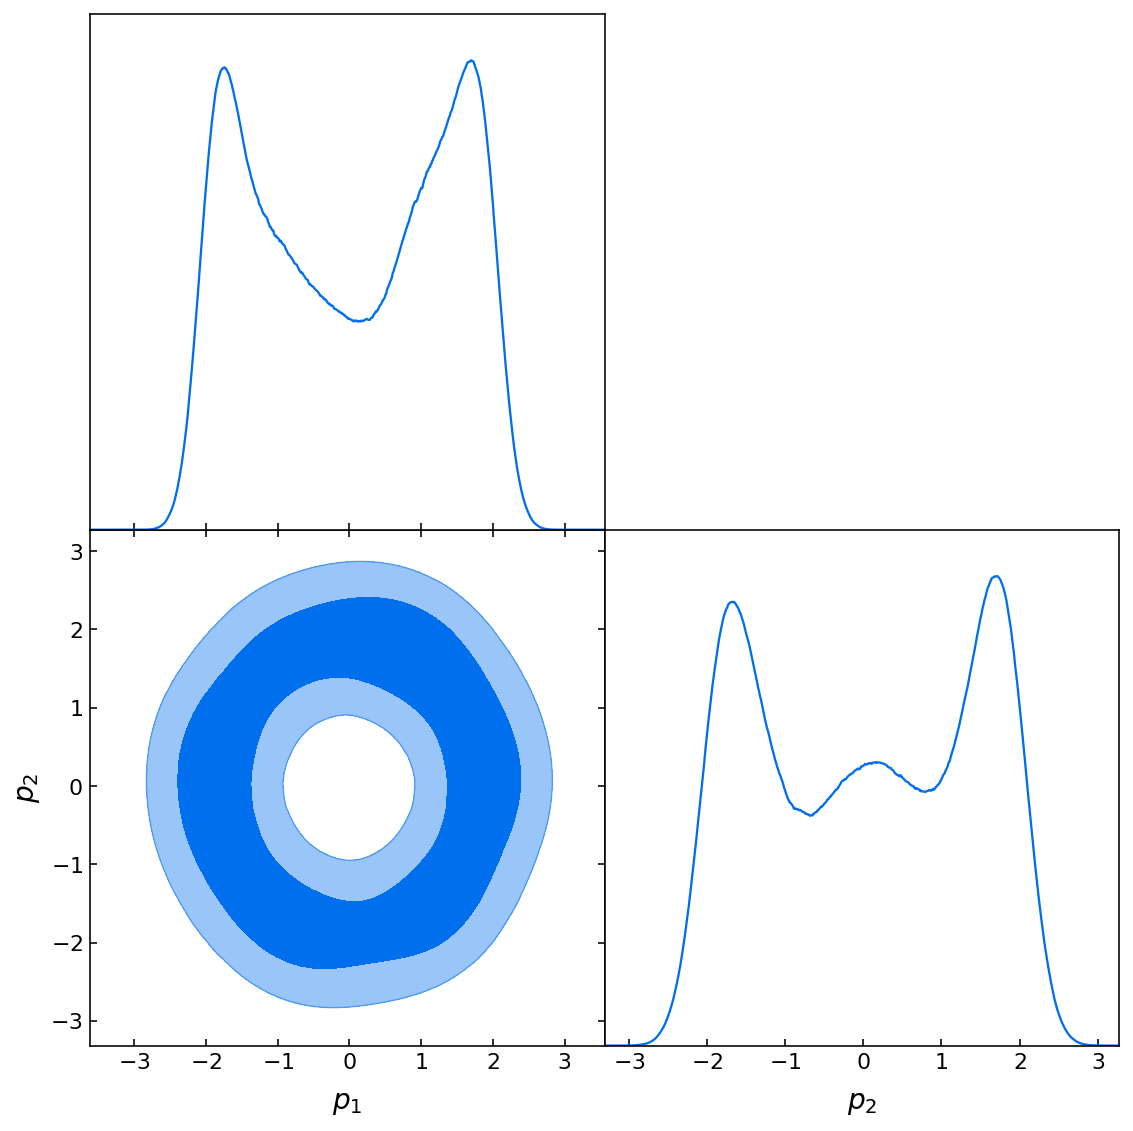

In [11]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)

In [12]:
v = 1
m = mc.getMargeStats()
for i in range(like.x_dim):
    upper = m.names[i].mean + 2*m.names[i].err
    lower = m.names[i].mean - 2*m.names[i].err
    r = upper - lower
    v *= r
print(v / 10**like.x_dim)

0.3221443455216406
